#Import necessary libraries

In [601]:
#connect to google drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [602]:
#connect to kaggle
!mkdir -p ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [603]:
#download the dataset
!kaggle datasets download --unzip crawford/80-cereals

  0% 0.00/2.24k [00:00<?, ?B/s]
100% 2.24k/2.24k [00:00<00:00, 5.88MB/s]


In [604]:
#import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [605]:
#read dataset
data = pd.read_csv('cereal.csv')

In [606]:
#visualize the head of the dataset
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [607]:
# shape
data.shape

(77, 16)

In this dataset, there are 16 columns:

* name - the name of cereal

* mfr - manufacturer of cereal
( A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina )

* type - cold or hot

* calories - calories per serving

* protein - grams of protein

* fat - grams of fat
* sodium - milligrams of sodium
* fiber - grams of dietary fiber
* carbo - grams of complex carbohydrates
* sugars - grams of sugars
* potass - milligrams of potassium
* vitamin - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight - weight in ounces of one serving
* cups - number of cups in one serving
* rating - a rating of the cereals

In [608]:
# types
data.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [609]:
#verify if there are any NaN values
data.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# Exploratory Data Analysis

##Univariate Analysis

In [610]:
#analyze the data
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


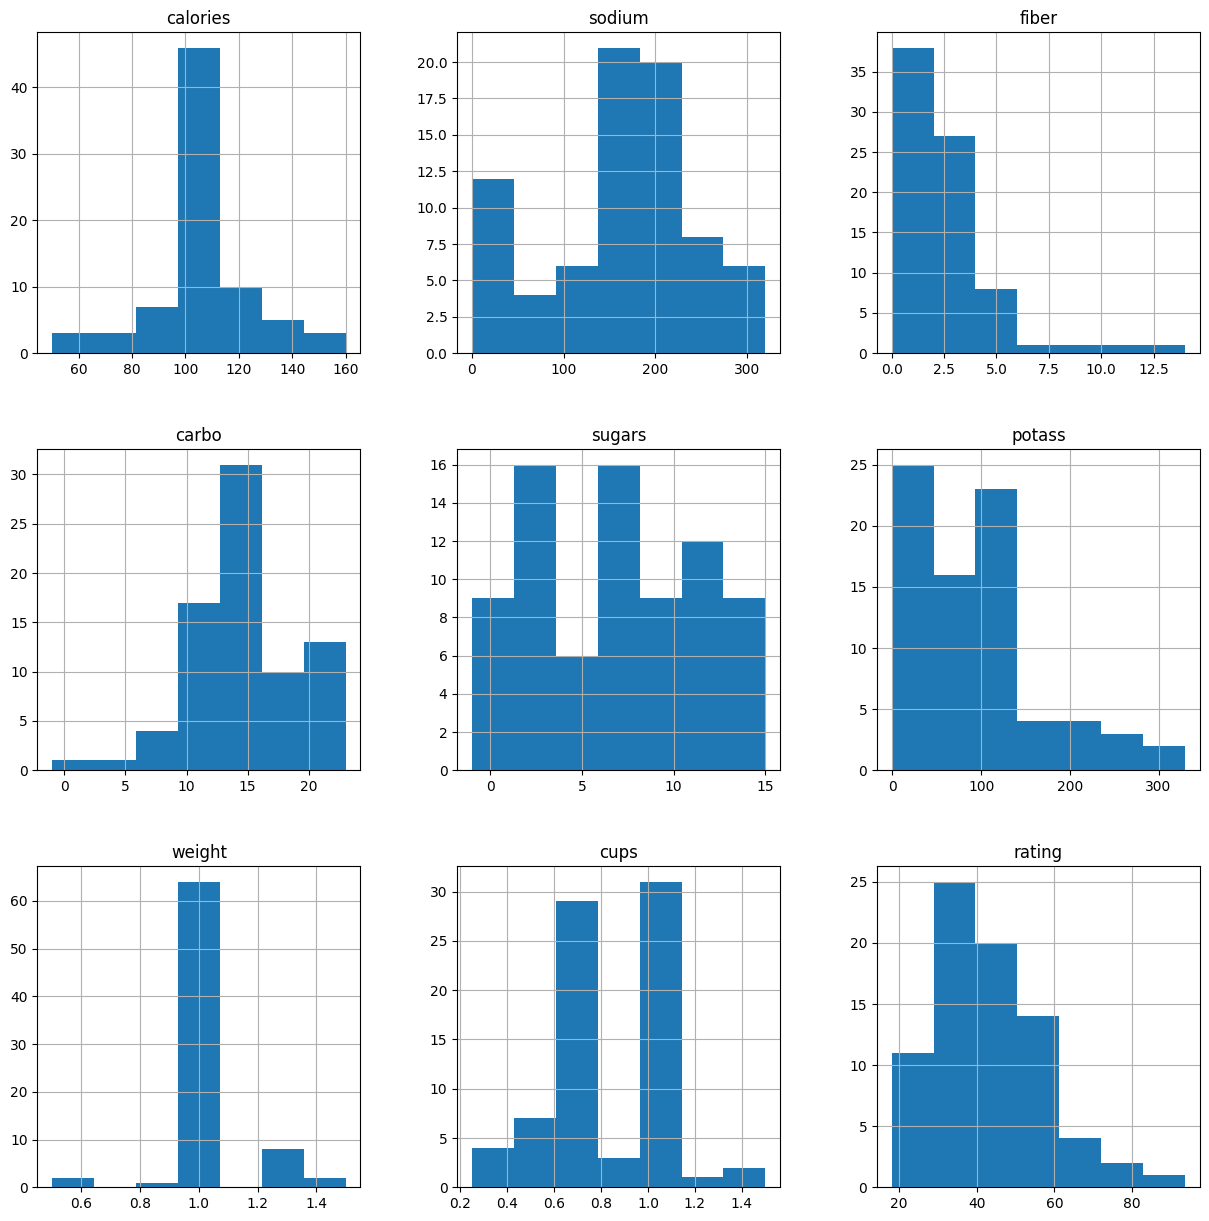

In [611]:
#display histograms for continuous variables
hist_data = data.copy()
hist_data.drop(['protein', 'fat', 'shelf', 'vitamins'], axis = 1, inplace = True)
hist_data.hist(bins=7, figsize=(15, 15))
plt.show()

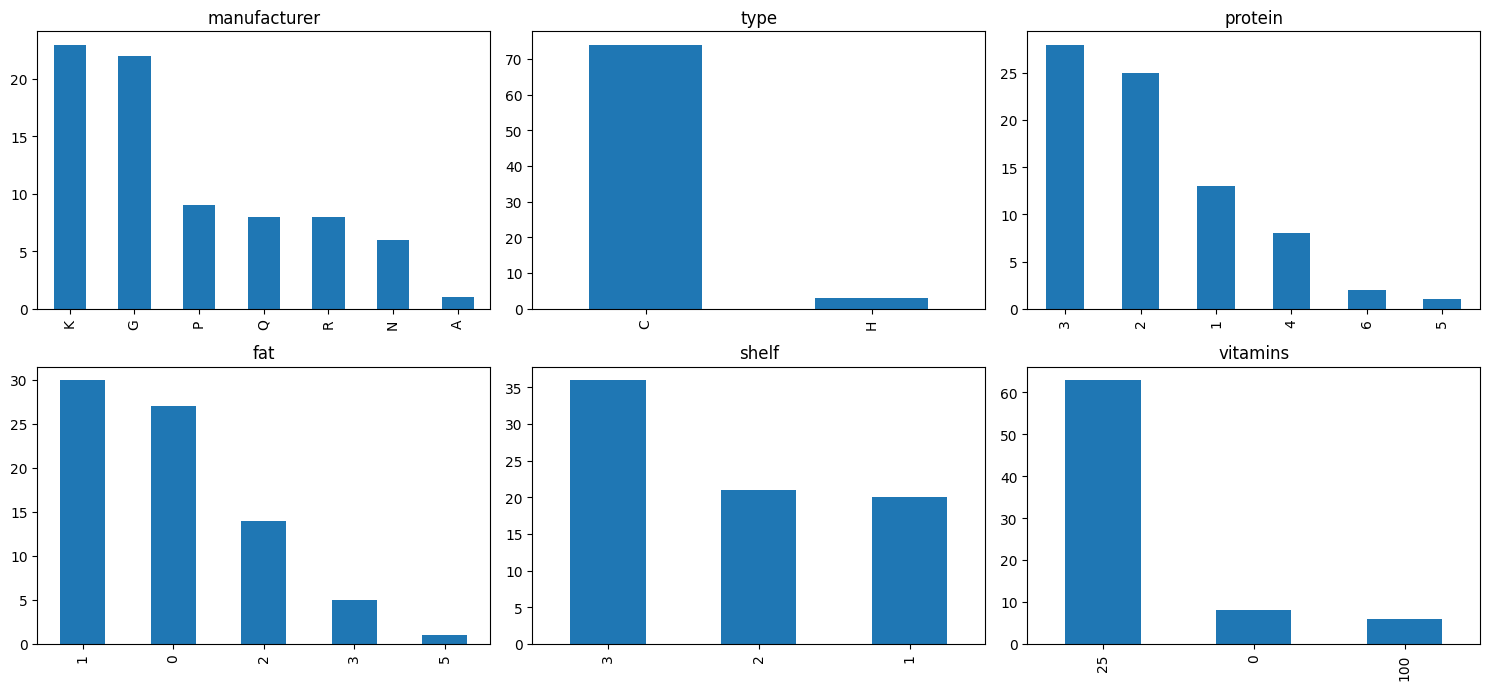

In [612]:
#display bar plots for discrete variables

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
data['mfr'].value_counts().plot(kind='bar')
plt.title('manufacturer')

plt.subplot(3, 3, 2)
data['type'].value_counts().plot(kind='bar')
plt.title('type')

plt.subplot(3, 3, 3)
data['protein'].value_counts().plot(kind='bar')
plt.title('protein')

plt.subplot(3, 3, 4)
data['fat'].value_counts().plot(kind='bar')
plt.title('fat')

plt.subplot(3, 3, 5)
data['shelf'].value_counts().plot(kind='bar')
plt.title('shelf')


plt.subplot(3, 3, 6)
data['vitamins'].value_counts().plot(kind='bar')
plt.title('vitamins')


plt.tight_layout()

plt.show()


## Multivariate Analysis

**Hypothesis 1:** If individuals buy cereal, they rate with a higher score the options with less calories and more healthy.

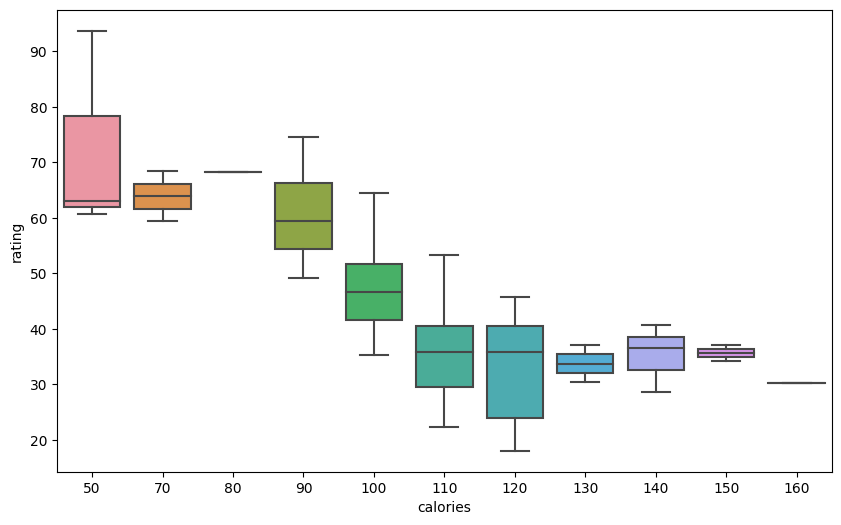

In [613]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = data['calories'],
            y = data['rating'])
plt.show()

**Conclusion:** Individuals do prefer the healthier options of cereal, with less calories, rating them higher.

**Hypothesis 2:** If cereal contains more protein, customers rate it with a higher score.

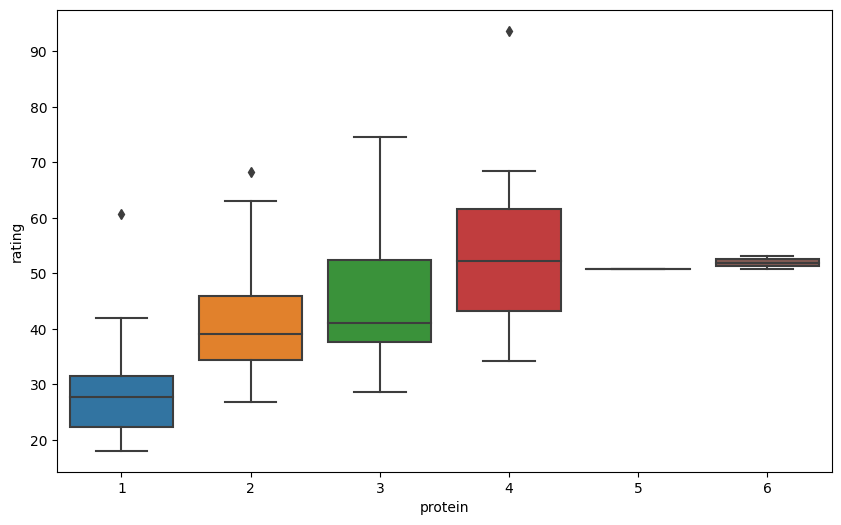

In [614]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = data['protein'],
            y = data['rating'])
plt.show()

**Conclusion:** Indeed, the more proteins the cereal has, the better rating it gets.

**Hypothesis 3:** If cereal has a low level of fat, it gets better rating.

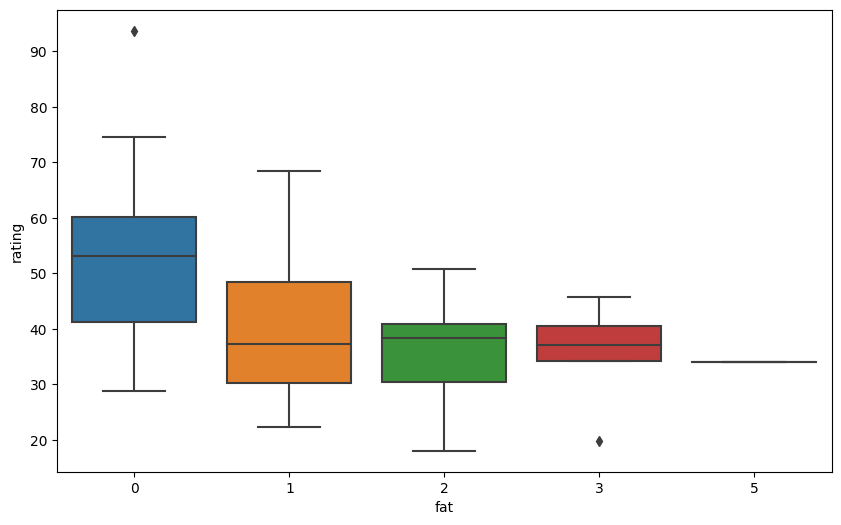

In [615]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = data['fat'],
            y = data['rating'])
plt.show()

**Conclusion:** Cereal with lower levels of fat get better rating.

**Hypothesis 4:** If cereal has a high level of sodium, it gets better rating.

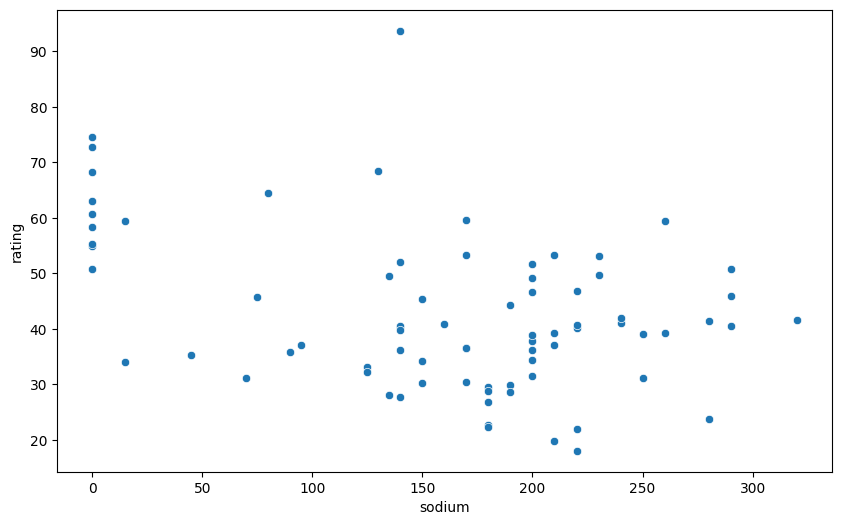

In [616]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = data['sodium'],
            y = data['rating'])
plt.show()

**Conclusion:** The level of sodium doesn't influence directly the value of rating.

**Hypothesis 5:** If cereal has a high level of fiber, it gets better rating.

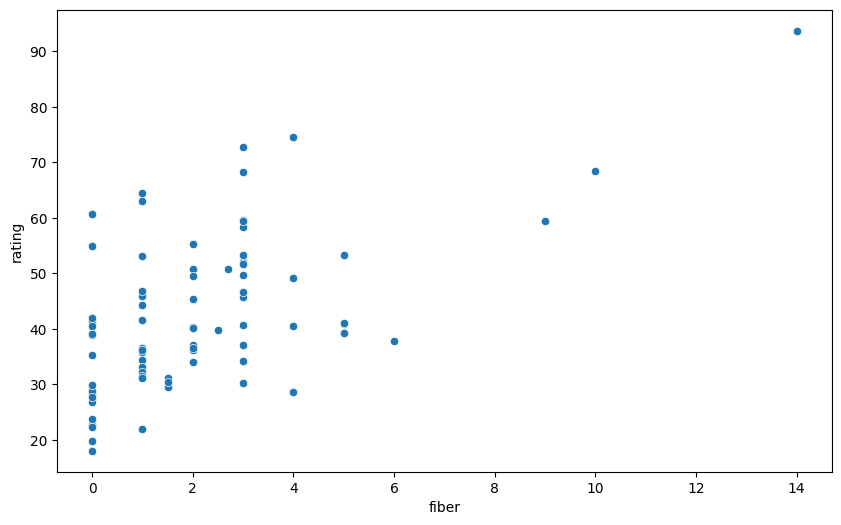

In [617]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = data['fiber'],
            y = data['rating'])
plt.show()

**Conclusion:** Cereal indeed gets better rating if it has a high level of fiber.

**Hypothesis 6:** If cereal has a higher level of complex carbohydrates, it gets better rating.

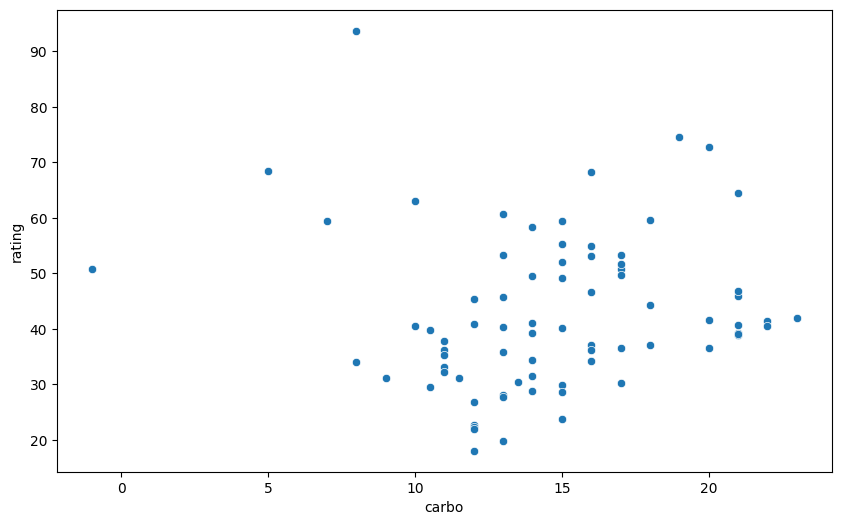

In [618]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = data['carbo'],
            y = data['rating'])
plt.show()

**Conclusion:** The cereal with a higher level of complex carbohydrates
gets better rating.

**Hypothesis 7:** If cereal has a lower level of sugar, it gets better rating.

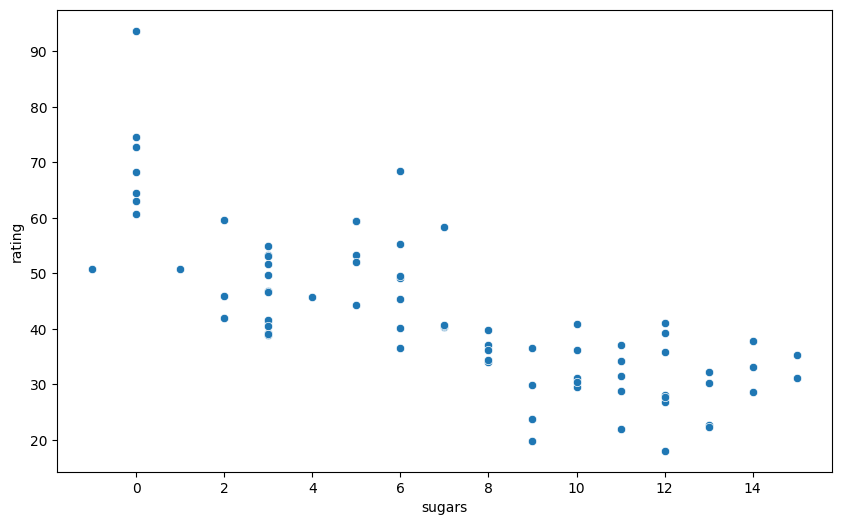

In [619]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = data['sugars'],
            y = data['rating'])
plt.show()

**Conclusion:** Cereal with a lower level of sugars gets better rating.

**Hypothesis 8:** If cereal has a higher level of potassium, it gets better rating.

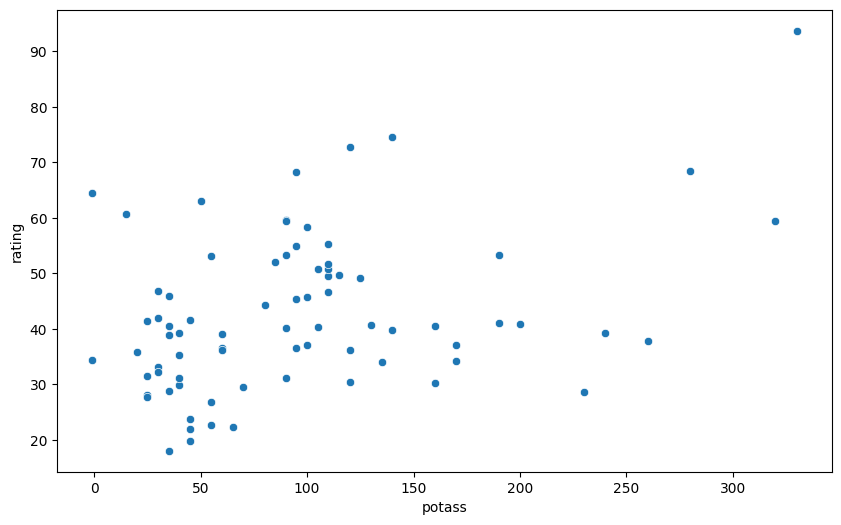

In [620]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = data['potass'],
            y = data['rating'])
plt.show()

**Conclusion:** The level of sodium doesn't influence directly the value of rating.

**Hypothesis 9:** If cereal has a higher percentage of vitamins, it gets better rating.

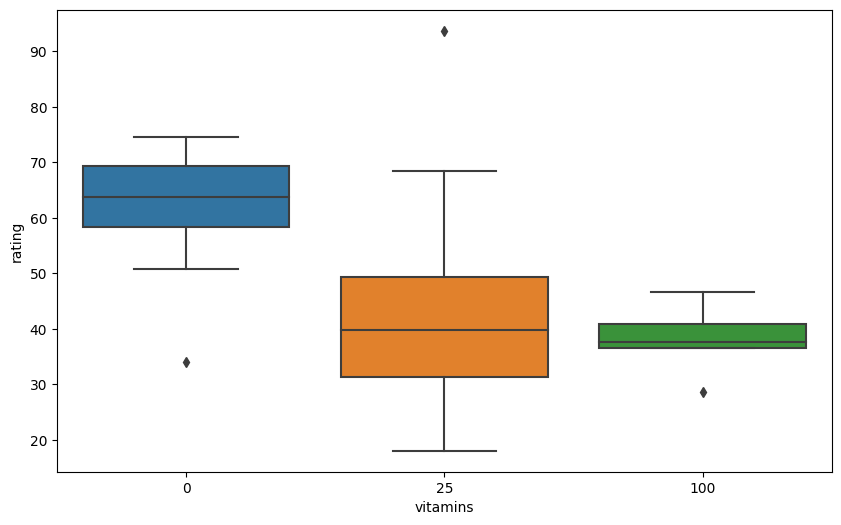

In [621]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = data['vitamins'],
            y = data['rating'])
plt.show()

**Conclusion:** Cereal with a lower percentage of vitamins gets better rating.

**Hypothesis 10:** If cereal is placed on a higher shelf, it gets better rating.

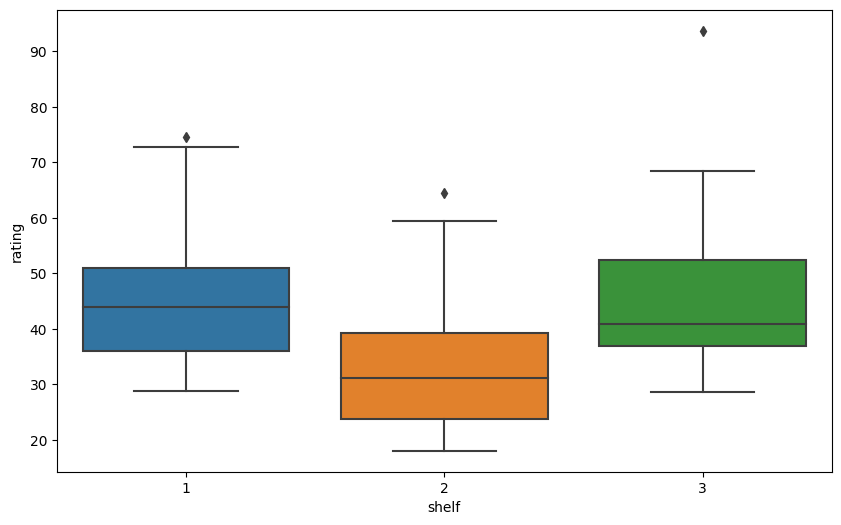

In [622]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = data['shelf'],
            y = data['rating'])
plt.show()

**Conclusion:** The placement of the cereal doesn't influence it rating.

**Hypothesis 11:** If cereal is rated, the weight of a serving doesn't influence its rating.

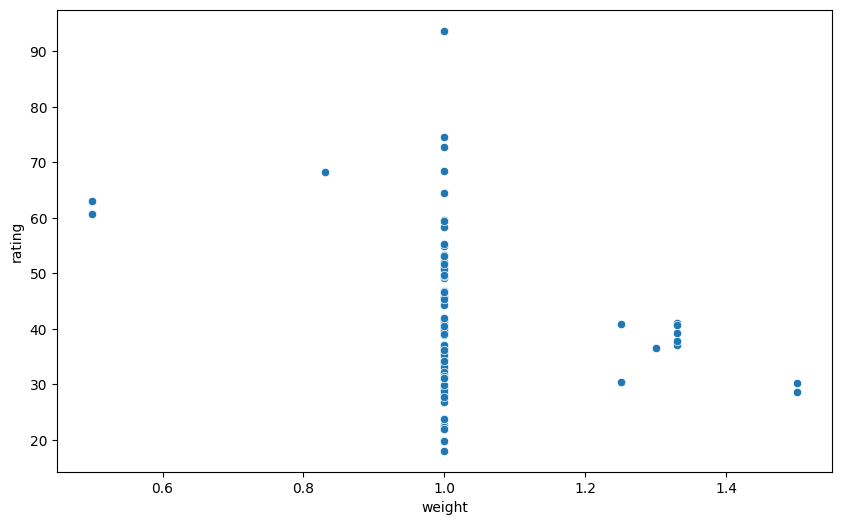

In [623]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = data['weight'],
            y = data['rating'])
plt.show()

**Concluzie:** The weight of one serving doesn't influence the rating of the cereal.

**Hypothesis 12:** If rated, cereal is not evaluated based on the number of cups in one serving.

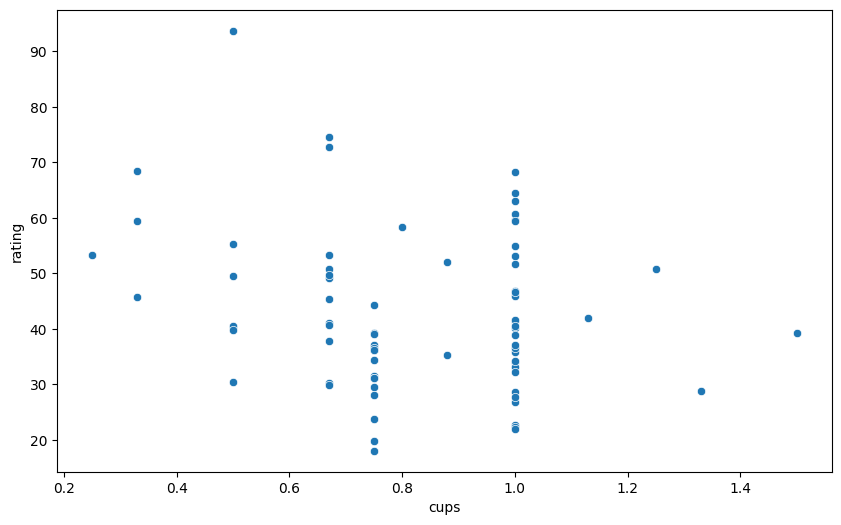

In [624]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = data['cups'],
            y = data['rating'])
plt.show()

**Conclusion:** Cereal is not rated based on the number of cups in one serving.

**Hypothesis 13:** If cereal is rated, particular manufacturers tend to have higher rating.

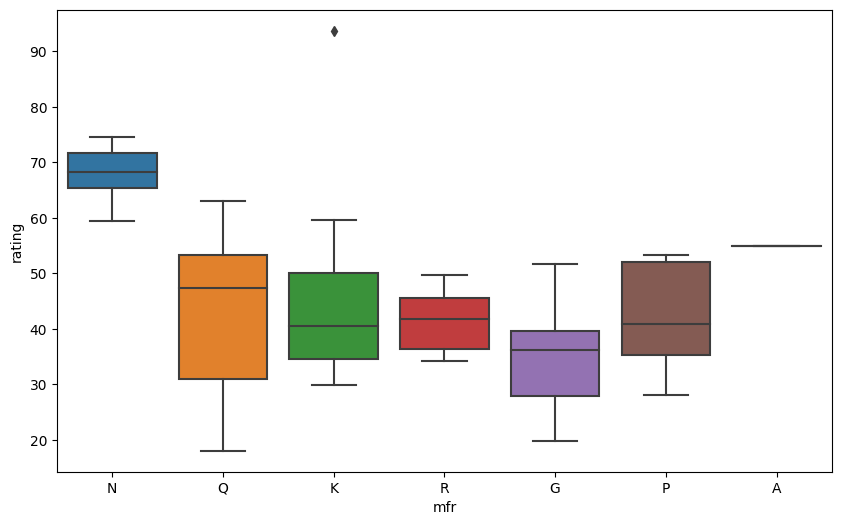

In [625]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = data['mfr'],
            y = data['rating'])
plt.show()

**Conclusion:** Indeed, particular manufacturers tend to have higher rating.

**Hypothesis 14:** If cereal is rated, hot cereal tends to have higher rating.

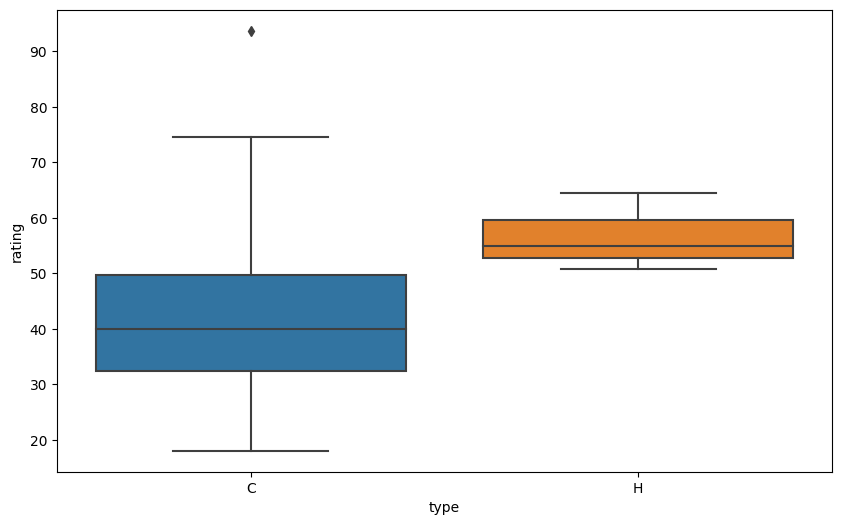

In [626]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = data['type'],
            y = data['rating'])
plt.show()

**Conclusion:** Indeed, hot cereal tends to have higher rating.

In [627]:
#calculate the correlatioin between data
data.corr()

<ipython-input-627-2a4fe9152258>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


<ipython-input-628-d3a06fc4c8ae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), cmap="Blues", annot=True)


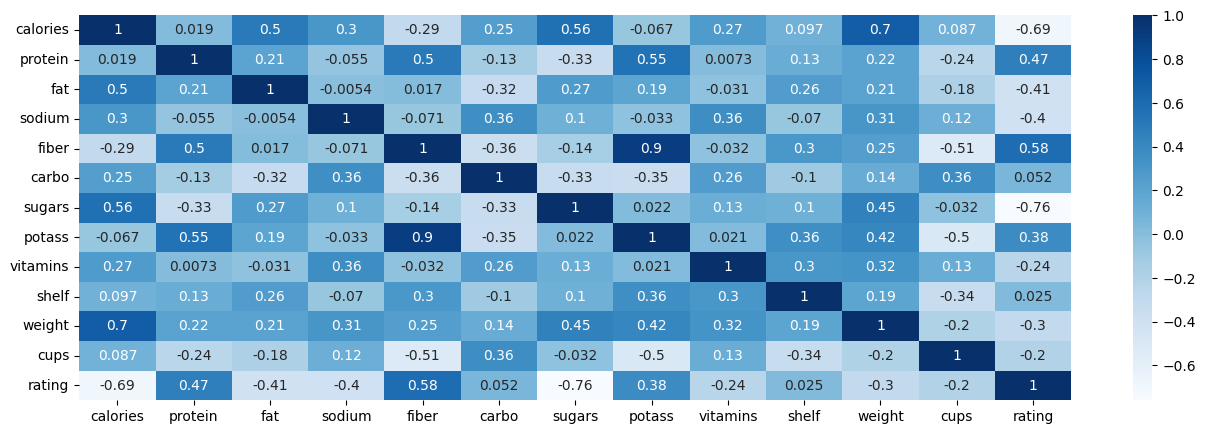

In [628]:
#plot the heatmap
plt.figure(figsize = (16,5))
ax = sns.heatmap(data.corr(), cmap="Blues", annot=True)

**Conclusion:** The level of protein, fiber, and potassium proportionally influence the rating, while the level of calories, fat, sodium, sugars, and vitamins influence the rating inversely proportionally.

# Data Cleaning and Preparation

In [629]:
#get rid of the columns that aren't needed
data.drop(columns=['carbo', 'shelf', 'name'], axis=1, inplace=True)

In [630]:
data.head()

,mfr,type,calories,protein,fat,sodium,fiber,sugars,potass,vitamins,weight,cups,rating
0,N,C,70,4,1,130,10.0,6,280,25,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8,135,0,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,5,320,25,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,0,330,25,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,8,-1,25,1.0,0.75,34.384843


In [631]:
#encode mfr
dummy_mfr = pd.get_dummies(data['mfr'], prefix='mfr')
data = pd.concat([data, dummy_mfr], axis=1)
data = data.drop(['mfr', 'mfr_A'], axis=1)

In [632]:
#encode type
dummy_mfr = pd.get_dummies(data['type'], prefix='type')
data = pd.concat([data, dummy_mfr], axis=1)
data = data.drop(['type', 'type_C'], axis=1)

In [633]:
data.head()

,calories,protein,fat,sodium,fiber,sugars,potass,vitamins,weight,cups,rating,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,70,4,1,130,10.0,6,280,25,1.0,0.33,68.402973,0,0,1,0,0,0,0
1,120,3,5,15,2.0,8,135,0,1.0,1.00,33.983679,0,0,0,0,1,0,0
2,70,4,1,260,9.0,5,320,25,1.0,0.33,59.425505,0,1,0,0,0,0,0
3,50,4,0,140,14.0,0,330,25,1.0,0.50,93.704912,0,1,0,0,0,0,0
4,110,2,2,200,1.0,8,-1,25,1.0,0.75,34.384843,0,0,0,0,0,1,0


In [634]:
#apply feature scalling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'potass', 'vitamins', 'weight', 'cups']

scaler = StandardScaler()
scaler.fit(data[cols_to_scale])

data[cols_to_scale] = scaler.transform(data[cols_to_scale])

In [635]:
#split data
X = data.drop(columns = 'rating', axis = 1)
y = data['rating']

In [636]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Model Creation

In [637]:
#import models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [638]:
#create a list of the models to use it later
models = [
          KNeighborsRegressor(),
          DecisionTreeRegressor(),
          ExtraTreeRegressor(),
          SVR(),
          LinearRegression()
]


In [639]:
#import score
from sklearn.metrics import mean_absolute_error

In [640]:
#create a function that will train the models and will return a dictionary of their accuracy score
def test_model(trainx, testx, trainy, testy, models):
    mae = {}
    for i in range(len(models)):
        models[i].fit(trainx, trainy)
        y_pred = models[i].predict(testx)

        mae[str(models[i].__class__)] = mean_absolute_error(y_pred, testy)

    return mae

In [641]:
mae = test_model(X_train, X_test, y_train, y_test, models)

In [642]:
#get the Mean Absolute Error Score
mae

{"<class 'sklearn.neighbors._regression.KNeighborsRegressor'>": 5.353679279999999,
 "<class 'sklearn.tree._classes.DecisionTreeRegressor'>": 6.648502599999999,
 "<class 'sklearn.tree._classes.ExtraTreeRegressor'>": 9.750208,
 "<class 'sklearn.svm._classes.SVR'>": 9.879780975211062,
 "<class 'sklearn.linear_model._base.LinearRegression'>": 1.9232714234122532}

#Final Conclusion

After analyzing this dataset, it has been observed that the level of protein, fiber, potassium, calories, fat, sodium, sugars, and vitamins influence the rating of cereal.

Using the presented data, 5 ML models have been trained. The best performing is the LinearRegression model, with only 1.9 MAE.

Future improvemets, such as testing different scalling tools, more ML models and using more metrics for the final decision, are welcomed.